# Bienvenidos al Taller de Ciencias de Datos Aplicada

## Primer Problema
Uno de los grandes problemas de las redes sociales es la creación de perfiles falsos debido a que implica desde creaciones superficiales de seguidores hasta tráfico de influencias y suplantación de identidad, una de las redes sociales que cuenta con más cuentas falsas es Instagram. Para eso, se quiere identificar las características y la probabilidad de un usuario de Instagram sea clasificado como una cuenta 'real' o una cuenta 'spammer'.<br><br>
Para más información de los datos se encuentran en: https://www.kaggle.com/free4ever1/instagram-fake-spammer-genuine-accounts

### Importación de los Datos
Primero, vamos a importar los datos y crear una descripción para entender las variables descritas en los datos. Para importar los datos vamos a utilizar Pandas (Que por defecto está instalado), y para el análisis de datos vamos a usar Pandas-Profiling. <br>
Para instalar un nuevo paquete se puede utilizar cualquiera de los siguientes comandos:
```python 
!conda install pandas-profiling -y
!pip install pandas-profiling[notebook]
```

In [ ]:
import pandas as pd
import pandas_profiling

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

pandas_profiling.ProfileReport(train)

### Separación de los datos
Es importante siempre tener dos conjuntos de datos, uno de entrenamiento y uno de test. Además es importante dividir los datos en las variables que queremos aprender como X y la respuesta que se desea obtener como Y, Así se realiza con los dos conjuntos de datos.

In [ ]:
X_train, Y_train = train.drop(['fake'],axis=1), train['fake']
X_test, Y_test = test.drop(['fake'],axis=1), test['fake']
display(X_train.head())

profile pic  nums/length username  fullname words  nums/length fullname  \
0            1                  0.27               0                   0.0   
1            1                  0.00               2                   0.0   
2            1                  0.10               2                   0.0   
3            1                  0.00               1                   0.0   
4            1                  0.00               2                   0.0   

   name==username  description length  external URL  private  #posts  \
0               0                  53             0        0      32   
1               0                  44             0        0     286   
2               0                   0             0        1      13   
3               0                  82             0        0     679   
4               0                   0             0        1       6   

   #followers  #follows  
0        1000       955  
1        2740       533  
2         159        98  
3         414       651  
4         151       126

### Entrenamiento del Modelo
Se va a utilizar la librería ```scikit-learn``` la cual está desarrollado para entrenar modelos simples para tareas de regresión, asociación, agrupación o clasificación hasta entrenamientos más complejos como Máquinas de Soporte Vectorial, Random Forest y Redes neuronales de 1 y 2 capas.<br>
Para más información sobre esta librería, tutoriales y documentación pueden visitar la <a href = 'https://scikit-learn.org/stable/' >Página Oficial</a>.
Para instalarlo lo puede hacer a través del siguiente código
```python
!pip install scikit-learn
```

In [ ]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()

clf.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

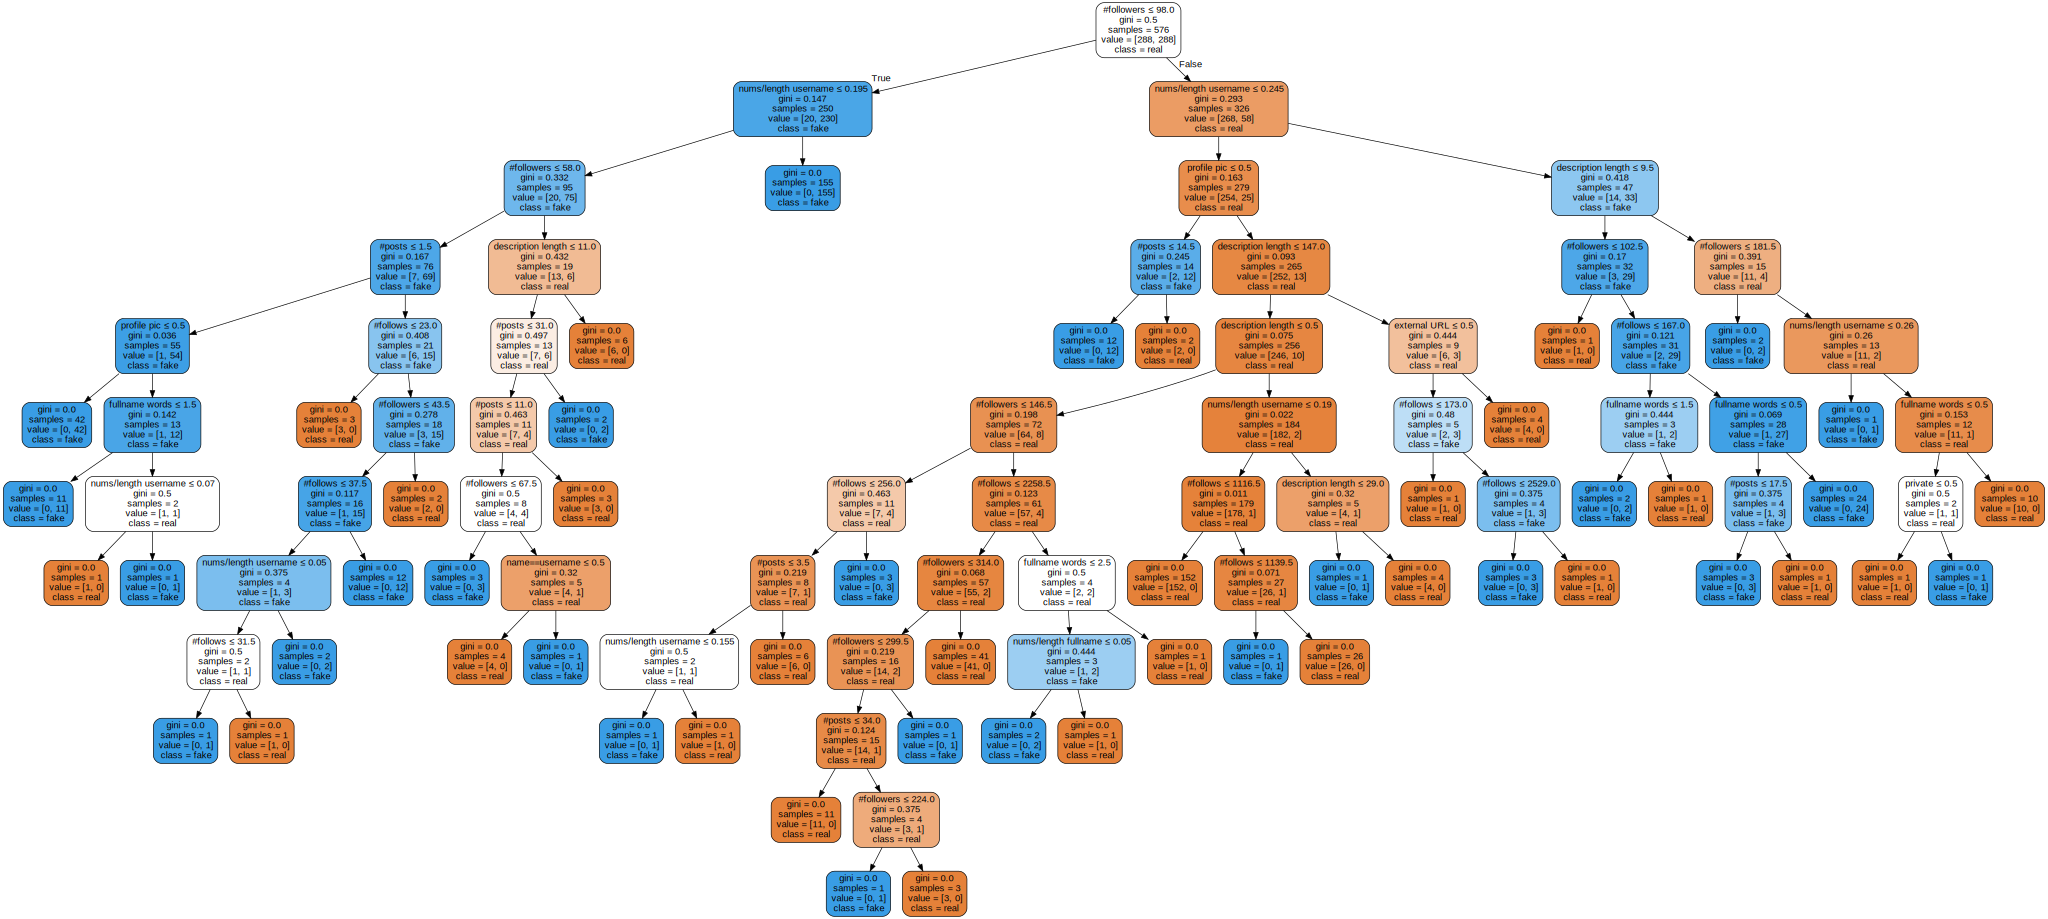

In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=list(X_train.columns),  
                      class_names=['real','fake'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [ ]:
from sklearn import metrics

report_train = metrics.classification_report(Y_train, clf.predict(X_train))
report_test = metrics.classification_report(Y_test, clf.predict(X_test))

print("Train Report \n", report_train)
print("Test Report \n", report_test)

Train Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       288
           1       1.00      1.00      1.00       288

    accuracy                           1.00       576
   macro avg       1.00      1.00      1.00       576
weighted avg       1.00      1.00      1.00       576

Test Report 
               precision    recall  f1-score   support

           0       0.90      0.92      0.91        60
           1       0.92      0.90      0.91        60

    accuracy                           0.91       120
   macro avg       0.91      0.91      0.91       120
weighted avg       0.91      0.91      0.91       120



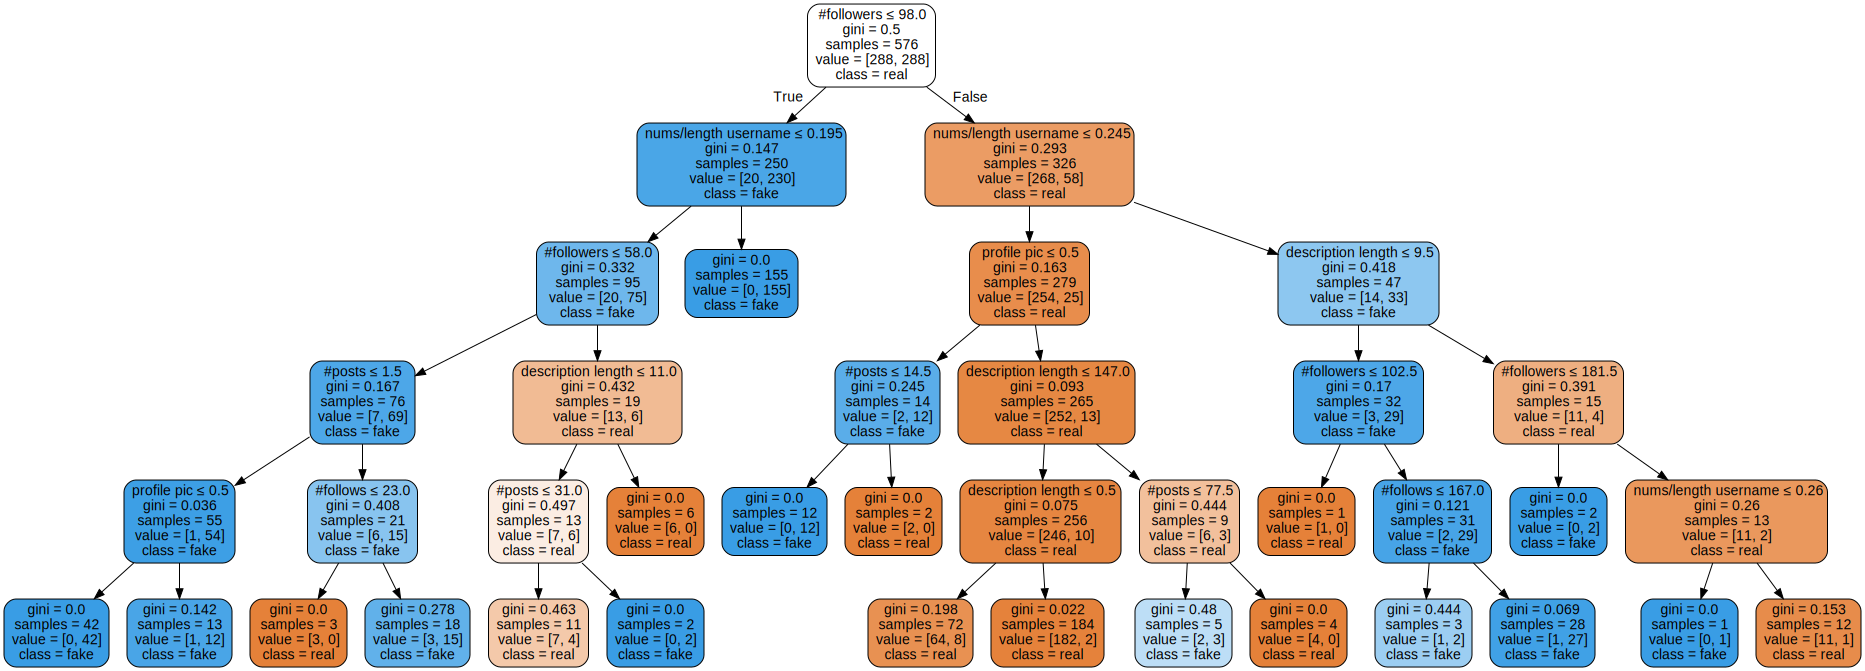

In [ ]:
clf_lim = tree.DecisionTreeClassifier(max_depth=5)
clf_lim.fit(X_train, Y_train)

dot_data = tree.export_graphviz(clf_lim, out_file=None, 
                      feature_names=list(X_train.columns),  
                      class_names=['real','fake'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [ ]:
report_train = metrics.classification_report(Y_train, clf_lim.predict(X_train))
report_test = metrics.classification_report(Y_test, clf_lim.predict(X_test))

print("Train Report \n", report_train)
print("Test Report \n", report_test)

Train Report 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       288
           1       0.97      0.95      0.96       288

    accuracy                           0.96       576
   macro avg       0.96      0.96      0.96       576
weighted avg       0.96      0.96      0.96       576

Test Report 
               precision    recall  f1-score   support

           0       0.82      0.93      0.87        60
           1       0.92      0.80      0.86        60

    accuracy                           0.87       120
   macro avg       0.87      0.87      0.87       120
weighted avg       0.87      0.87      0.87       120

